# Fake New Classification using news headline

In [1]:
import pandas as pd
import numpy as np
import itertools
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
df = pd.read_csv('fake_news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


### Data Cleaning

In [4]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [5]:
# converting to lowercase
df['title']=df['title'].str.lower()
df.head()

,title,text,label
0,"as u.s. budget fight looms, republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,u.s. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,senior u.s. republican senator: 'let mr. muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,fbi russia probe helped by australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,trump wants postal service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


### Removing Stopwords

In [6]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['title']=df['title'].apply(remove_stopwords)

In [10]:
spec_chars = ["-","!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['title'] = df['title'].str.replace(char, '')





df.head()

C:\Users\zaina\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,title,text,label
19594,hurricane maria makes landfall puerto rico nhc,(Reuters) - Hurricane Maria has made landfall ...,TRUE
37601,shocking report 50 babies 24 states born via m...,New Mexico led all states with 72 percent of t...,FAKE
36027,germany crisis escalates muslim migrants mastu...,What a great place to take the whole family!We...,FAKE
3460,trump speaks merkel macron trudeau may climate...,WASHINGTON (Reuters) - U.S. President Donald T...,TRUE
22347,trump unpopular crowds bussed cheer poland visit,Amateur president Donald Trump isn t well like...,FAKE


### shuffle dataframe

In [11]:
df =df.reindex(np.random.permutation(df.index))

In [12]:
df.head()

,title,text,label
31041,can’t make up special counsel leading trumprus...,You seriously can t make this stuff up Wouldn ...,FAKE
33689,jill stein hillary’s recount collapses misses ...,Jill Stein got less than 1% of the vote nation...,FAKE
13706,mexico finance minister resigns seek presidenc...,MEXICO CITY (Reuters) - Mexico s finance minis...,TRUE
18846,iraqi pms office says turkey agrees deal baghd...,BAGHDAD (Reuters) - Turkey told Iraq it would ...,TRUE
26786,president obama smacks trump’s bullsht — claim...,Donald Trump made a lot of bullshit claims dur...,FAKE


In [13]:
y = df.label

In [14]:
X = df['title']

### Train test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

### Baseline model using count vectorizer

In [16]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

accuracy:   0.941
Confusion matrix, without normalization


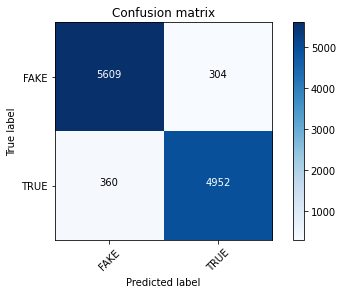

In [14]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.942
Confusion matrix, without normalization


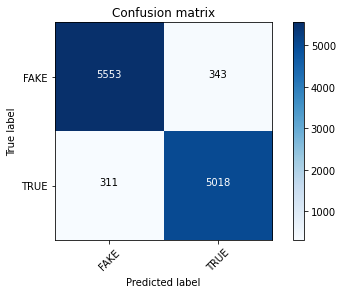

In [17]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.950
Confusion matrix, without normalization


C:\Users\zaina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


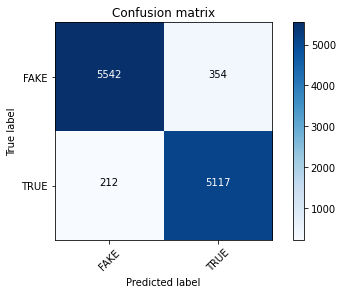

In [18]:
clf = LogisticRegression()
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

## TFIDF Experiment (n_gram=2 (bigram) and max_df)
TF-IDF stands for term frequency-inverse document frequency and it is a measure that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc)  in a document amongst a collection of documents (also known as a corpus).

Term frequency works by looking at the frequency of a particular term you are concerned with relative to the document.

Inverse document frequency looks at how common (or uncommon) a word is amongst the corpus.

In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

accuracy:   0.943
Confusion matrix, without normalization


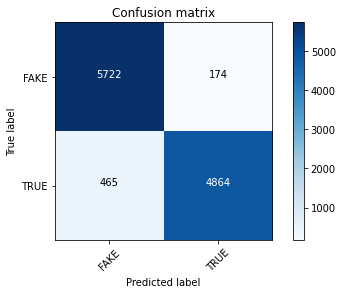

In [20]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.958
Confusion matrix, without normalization


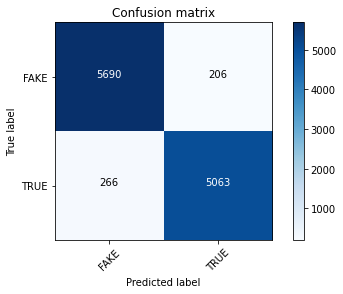

In [21]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.942
Confusion matrix, without normalization


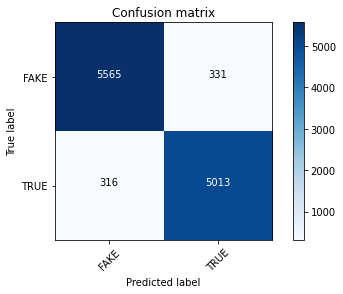

In [22]:
log_tf = LogisticRegression()
log_tf.fit(tfidf_train_2, y_train)
pred = log_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

## TFIDF Experiment (n_gram=3 (trigram) and max_df)

In [23]:
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer_3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer_3.transform(X_test)

accuracy:   0.944
Confusion matrix, without normalization


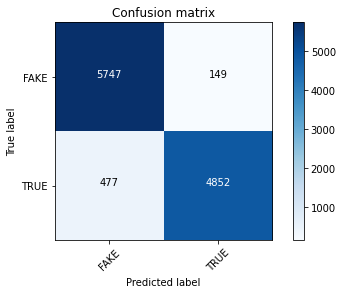

In [24]:
mnb_tf2 = MultinomialNB()
mnb_tf2.fit(tfidf_train_3, y_train)
pred = mnb_tf2.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.958
Confusion matrix, without normalization


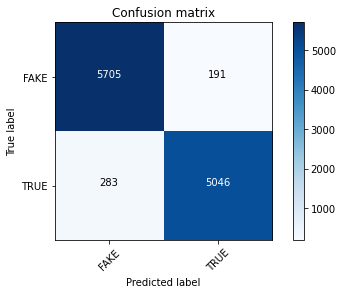

In [25]:
pass_tf2 = PassiveAggressiveClassifier()
pass_tf2.fit(tfidf_train_3, y_train)
pred = pass_tf2.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.939
Confusion matrix, without normalization


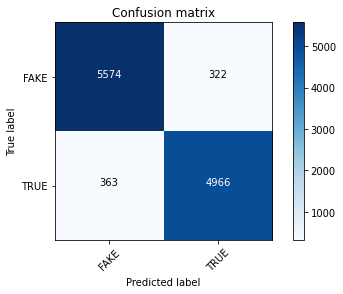

In [26]:
log_tf2 = LogisticRegression()
log_tf2.fit(tfidf_train_3, y_train)
pred = log_tf2.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

In [27]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df.head()

,00,0149,02,025,0330,0930,10,100,1000,10000,...,zoos,zucker,zuckerberg,zulia,zuma,zumas,zummar,zurichs,état,žižek
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, pass_tf, n=10)

FAKE -16.14526694728885 video
FAKE -8.114892389516157 breaking
FAKE -7.7471126112778945 hillary
FAKE -7.340973902905366 gop
FAKE -7.328620491352287 watch
FAKE -5.132989182116785 racist
FAKE -4.346070287495269 tweets
FAKE -4.317636092991879 america
FAKE -4.232944426890689 details
FAKE -4.009722383630753 won

TRUE 5.9603856634046615 trumps
TRUE 5.423342016493672 says
TRUE 4.744735876380599 factbox
TRUE 3.45866068356662 urges
TRUE 3.4124295582809836 talks
TRUE 3.3116095362734335 exclusive
TRUE 3.2709843963116243 seek
TRUE 3.251838278167567 rohingya
TRUE 3.077210873373121 islamic state
TRUE 3.0397046498149423 seeks


In [30]:
most_informative_feature_for_binary_classification(tfidf_vectorizer_3, pass_tf, n=10)

FAKE -16.14526694728885 land potential goldmine
FAKE -8.114892389516157 arrest christian priest
FAKE -7.7471126112778945 court protesting red
FAKE -7.340973902905366 conference twitter shatters
FAKE -7.328620491352287 leadership hatred
FAKE -5.132989182116785 gem reporter evidence
FAKE -4.346070287495269 kill white
FAKE -4.317636092991879 additional strikes
FAKE -4.232944426890689 california bring year
FAKE -4.009722383630753 libs twitter nuts

TRUE 5.9603856634046615 kellyanne conway sketch
TRUE 5.423342016493672 harm texas mosque
TRUE 4.744735876380599 chose democrats rise
TRUE 3.45866068356662 korea ross
TRUE 3.4124295582809836 internet brilliant gopdebate
TRUE 3.3116095362734335 chicago sues trump
TRUE 3.2709843963116243 hersh trump
TRUE 3.251838278167567 guatemalans stay
TRUE 3.077210873373121 debt russia
TRUE 3.0397046498149423 hhs secretary stole


### Hashing Vectorizer (Exploring parameters n_gram)

In [31]:
hash_vectorizer = HashingVectorizer(stop_words='english',ngram_range=(1,2))
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

accuracy:   0.955
Confusion matrix, without normalization


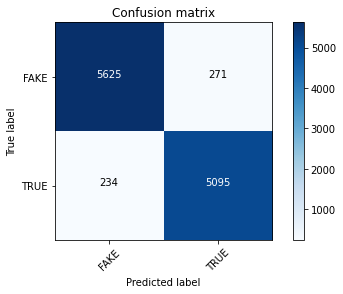

In [32]:
clf = PassiveAggressiveClassifier()
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

accuracy:   0.935
Confusion matrix, without normalization


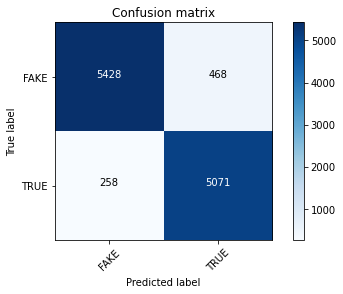

In [33]:
clf = LogisticRegression()
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])